In [1]:
#pip install xgboost

In [2]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

C:\Users\20193999\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
df = pd.read_csv('2019_data.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head(-5)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,...,Context,Local Authority District code (2019),Local Authority District name (2019),Employment Domain Score,Income Domain Score,IDACI Score,IDAOPI Score,Police Strength,Police Funding,Population
0,a8977a2a4e14252420371eb993d52e4d0b8288a7c833e6...,2019-01,Metropolitan Police Service,Metropolitan Police Service,-0.709911,50.784615,On or near Rochester Way,E01031384,Arun 018E,Violence and sexual offences,...,NaN,E07000224,Arun,"0,054","0,058","0,055","0,069","30,435",2572,154.414
1,NaN,2019-01,Metropolitan Police Service,Metropolitan Police Service,0.140192,51.582311,On or near Hatch Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,...,NaN,E09000002,Barking and Dagenham,"0,146","0,216","0,276","0,231","30,435",2572,198.294
2,934e173f2bc2e1dd3a257b37939d8f97575d3eeb89ff0c...,2019-01,Metropolitan Police Service,Metropolitan Police Service,0.140192,51.582311,On or near Hatch Grove,E01000027,Barking and Dagenham 001A,Burglary,...,NaN,E09000002,Barking and Dagenham,"0,146","0,216","0,276","0,231","30,435",2572,198.294
3,4f5b7e424bc78b1fb8c32e07da61176d2cbc5a3849d8e1...,2019-01,Metropolitan Police Service,Metropolitan Police Service,0.140634,51.583427,On or near Rams Grove,E01000027,Barking and Dagenham 001A,Burglary,...,NaN,E09000002,Barking and Dagenham,"0,146","0,216","0,276","0,231","30,435",2572,198.294
4,53d960600a4a9f54b785f598af4c75bdef2f79bce1a41b...,2019-01,Metropolitan Police Service,Metropolitan Police Service,0.141143,51.590873,On or near Furze Farm Close,E01000027,Barking and Dagenham 001A,Drugs,...,NaN,E09000002,Barking and Dagenham,"0,146","0,216","0,276","0,231","30,435",2572,198.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2348331,ca9365d6f6df6f218a06f1f32fb907061018f461bedad2...,2019-12,Hampshire Constabulary,Hampshire Constabulary,-1.068596,50.904531,On or near Carendon Close,E01023233,Winchester 014D,Violence and sexual offences,...,NaN,E07000094,Winchester,"0,047","0,055","0,068","0,082","2,697",315,119.218
2348332,091eb729242fa5503d83ae27e679b1986e48ed6da90fb0...,2019-12,Hampshire Constabulary,Hampshire Constabulary,-1.072551,50.903762,On or near Green Lane,E01023233,Winchester 014D,Violence and sexual offences,...,NaN,E07000094,Winchester,"0,047","0,055","0,068","0,082","2,697",315,119.218
2348333,0af34965867602d016c3e98b34f59c1e3c6828260ca90f...,2019-12,Hampshire Constabulary,Hampshire Constabulary,-1.074427,50.905233,On or near Glasspool,E01023233,Winchester 014D,Violence and sexual offences,...,NaN,E07000094,Winchester,"0,047","0,055","0,068","0,082","2,697",315,119.218
2348334,8e008c4280a3ef3cdfb7046444b988dbdb1f612d989fd2...,2019-12,Hampshire Constabulary,Hampshire Constabulary,-1.063798,50.902649,On or near Ashling Gardens,E01023234,Winchester 014E,Burglary,...,NaN,E07000094,Winchester,"0,064","0,091","0,093","0,142","2,697",315,119.218


In [5]:
df.dropna(subset=['LSOA code', 'Month', 'Location', 'Crime type', 'Longitude', 'Latitude', 'Employment Domain Score',
       'Income Domain Score', 'IDACI Score', 'IDAOPI Score', 'Police Strength',
       'Police Funding', 'Population'], inplace=True)

In [6]:
df.head(-5)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,...,Context,Local Authority District code (2019),Local Authority District name (2019),Employment Domain Score,Income Domain Score,IDACI Score,IDAOPI Score,Police Strength,Police Funding,Population
0,a8977a2a4e14252420371eb993d52e4d0b8288a7c833e6...,2019-01,Metropolitan Police Service,Metropolitan Police Service,-0.709911,50.784615,On or near Rochester Way,E01031384,Arun 018E,Violence and sexual offences,...,NaN,E07000224,Arun,"0,054","0,058","0,055","0,069","30,435",2572,154.414
1,NaN,2019-01,Metropolitan Police Service,Metropolitan Police Service,0.140192,51.582311,On or near Hatch Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,...,NaN,E09000002,Barking and Dagenham,"0,146","0,216","0,276","0,231","30,435",2572,198.294
2,934e173f2bc2e1dd3a257b37939d8f97575d3eeb89ff0c...,2019-01,Metropolitan Police Service,Metropolitan Police Service,0.140192,51.582311,On or near Hatch Grove,E01000027,Barking and Dagenham 001A,Burglary,...,NaN,E09000002,Barking and Dagenham,"0,146","0,216","0,276","0,231","30,435",2572,198.294
3,4f5b7e424bc78b1fb8c32e07da61176d2cbc5a3849d8e1...,2019-01,Metropolitan Police Service,Metropolitan Police Service,0.140634,51.583427,On or near Rams Grove,E01000027,Barking and Dagenham 001A,Burglary,...,NaN,E09000002,Barking and Dagenham,"0,146","0,216","0,276","0,231","30,435",2572,198.294
4,53d960600a4a9f54b785f598af4c75bdef2f79bce1a41b...,2019-01,Metropolitan Police Service,Metropolitan Police Service,0.141143,51.590873,On or near Furze Farm Close,E01000027,Barking and Dagenham 001A,Drugs,...,NaN,E09000002,Barking and Dagenham,"0,146","0,216","0,276","0,231","30,435",2572,198.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2348331,ca9365d6f6df6f218a06f1f32fb907061018f461bedad2...,2019-12,Hampshire Constabulary,Hampshire Constabulary,-1.068596,50.904531,On or near Carendon Close,E01023233,Winchester 014D,Violence and sexual offences,...,NaN,E07000094,Winchester,"0,047","0,055","0,068","0,082","2,697",315,119.218
2348332,091eb729242fa5503d83ae27e679b1986e48ed6da90fb0...,2019-12,Hampshire Constabulary,Hampshire Constabulary,-1.072551,50.903762,On or near Green Lane,E01023233,Winchester 014D,Violence and sexual offences,...,NaN,E07000094,Winchester,"0,047","0,055","0,068","0,082","2,697",315,119.218
2348333,0af34965867602d016c3e98b34f59c1e3c6828260ca90f...,2019-12,Hampshire Constabulary,Hampshire Constabulary,-1.074427,50.905233,On or near Glasspool,E01023233,Winchester 014D,Violence and sexual offences,...,NaN,E07000094,Winchester,"0,047","0,055","0,068","0,082","2,697",315,119.218
2348334,8e008c4280a3ef3cdfb7046444b988dbdb1f612d989fd2...,2019-12,Hampshire Constabulary,Hampshire Constabulary,-1.063798,50.902649,On or near Ashling Gardens,E01023234,Winchester 014E,Burglary,...,NaN,E07000094,Winchester,"0,064","0,091","0,093","0,142","2,697",315,119.218


In [7]:
df.sort_values(by="Month")

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,...,Context,Local Authority District code (2019),Local Authority District name (2019),Employment Domain Score,Income Domain Score,IDACI Score,IDAOPI Score,Police Strength,Police Funding,Population
0,a8977a2a4e14252420371eb993d52e4d0b8288a7c833e6...,2019-01,Metropolitan Police Service,Metropolitan Police Service,-0.709911,50.784615,On or near Rochester Way,E01031384,Arun 018E,Violence and sexual offences,...,NaN,E07000224,Arun,"0,054","0,058","0,055","0,069","30,435",2572,154.414
1918269,d2ba517802ba07206d2576d630670e6a3e1e3b0cd6b982...,2019-01,Thames Valley Police,Thames Valley Police,-0.819947,51.821437,On or near Petrol Station,E01017666,Aylesbury Vale 013B,Other theft,...,NaN,E07000004,Aylesbury Vale,"0,118","0,122","0,163","0,130","4,149",391,184.56
1918268,d0b394692595f3b9c0465d375bde587cd3c148d6b5cf76...,2019-01,Thames Valley Police,Thames Valley Police,-0.815980,51.821657,On or near Sycamore Court,E01017666,Aylesbury Vale 013B,Drugs,...,NaN,E07000004,Aylesbury Vale,"0,118","0,122","0,163","0,130","4,149",391,184.56
1918267,3457b44e2bf5bcdfe766828a39499a8453434408bc4b8f...,2019-01,Thames Valley Police,Thames Valley Police,-0.819717,51.818575,On or near Palmer Avenue,E01017666,Aylesbury Vale 013B,Drugs,...,NaN,E07000004,Aylesbury Vale,"0,118","0,122","0,163","0,130","4,149",391,184.56
1918266,e053c47ce6a7986c9bc1e7a703302f4066df0e3a831491...,2019-01,Thames Valley Police,Thames Valley Police,-0.820359,51.818464,On or near Goodwin Road,E01017666,Aylesbury Vale 013B,Criminal damage and arson,...,NaN,E07000004,Aylesbury Vale,"0,118","0,122","0,163","0,130","4,149",391,184.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490270,0a26a2ee8ff9bf37dc5964d4093c2e778a557f52720049...,2019-12,Sussex Police,Sussex Police,0.556008,50.868793,On or near Petrol Station,E01021011,Hastings 006B,Burglary,...,NaN,E07000062,Hastings,"0,114","0,121","0,126","0,133","2,629",266,91.093
1490269,NaN,2019-12,Sussex Police,Sussex Police,0.556201,50.867907,On or near Supermarket,E01021011,Hastings 006B,Anti-social behaviour,...,NaN,E07000062,Hastings,"0,114","0,121","0,126","0,133","2,629",266,91.093
1490268,NaN,2019-12,Sussex Police,Sussex Police,0.556238,50.868059,On or near Supermarket,E01021011,Hastings 006B,Anti-social behaviour,...,NaN,E07000062,Hastings,"0,114","0,121","0,126","0,133","2,629",266,91.093
1490166,d4951358c3ac5f06633be0365820042219031968d3c5ae...,2019-12,Sussex Police,Sussex Police,0.599861,50.875244,On or near The Cheviots,E01020972,Hastings 005A,Robbery,...,NaN,E07000062,Hastings,"0,377","0,483","0,575","0,405","2,629",266,91.093


In [8]:
df.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context',
       'Local Authority District code (2019)',
       'Local Authority District name (2019)', 'Employment Domain Score',
       'Income Domain Score', 'IDACI Score', 'IDAOPI Score', 'Police Strength',
       'Police Funding', 'Population'],
      dtype='object')

In [9]:
#convert from british ',' to america '.'

df['Employment Domain Score']  =  df['Employment Domain Score'].str.replace('[A-Za-z]', '').str.replace(',', '.').astype(float)
df['Income Domain Score'] = df['Income Domain Score'].str.replace('[A-Za-z]', '').str.replace(',', '.').astype(float)
df['IDACI Score'] = df['IDACI Score'].str.replace('[A-Za-z]', '').str.replace(',', '.').astype(float)
df['IDAOPI Score'] = df['IDAOPI Score'].str.replace('[A-Za-z]', '').str.replace(',', '.').astype(float)
df['Police Strength'] = df['Police Strength'].str.replace('[A-Za-z]', '').str.replace(',', '.').astype(float)




C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


In [10]:
df.dtypes

Crime ID                                 object
Month                                    object
Reported by                              object
Falls within                             object
Longitude                               float64
Latitude                                float64
Location                                 object
LSOA code                                object
LSOA name                                object
Crime type                               object
Last outcome category                    object
Context                                 float64
Local Authority District code (2019)     object
Local Authority District name (2019)     object
Employment Domain Score                 float64
Income Domain Score                     float64
IDACI Score                             float64
IDAOPI Score                            float64
Police Strength                         float64
Police Funding                            int64
Population                              

In [11]:
df["Population"] = df["Population"].astype(str)

In [12]:
df['Population'] = df['Population'].str.replace('[A-Za-z]', '').str.replace('.', '').astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [13]:
data = df.groupby('Reported by').agg({'Crime type':'count', 'Employment Domain Score':'mean', 'Income Domain Score':'mean',  'IDACI Score':'mean', 'IDAOPI Score':'mean', 'Police Strength':'mean', 'Income Domain Score':'mean', 'Police Funding':'mean', 'Population':'mean' })

In [14]:
data.reset_index()

,Reported by,Crime type,Employment Domain Score,Income Domain Score,IDACI Score,IDAOPI Score,Police Strength,Police Funding,Population
0,Bedfordshire Police,67173,0.096148,0.137558,0.185515,0.196654,1.164,105.0,217518.205723
1,City of London Police,9356,0.026116,0.034127,0.033715,0.064954,739.000,57.0,17732.041257
2,Essex Police,209023,0.109429,0.145892,0.197408,0.166158,3.071,277.0,127734.816293
3,Hampshire Constabulary,163393,0.093014,0.126249,0.169952,0.173650,2.697,315.0,104826.377219
4,Hertfordshire Constabulary,112417,0.076297,0.101921,0.133432,0.135721,2.009,189.0,118639.144889
5,Kent Police,217910,0.117279,0.151934,0.197871,0.172519,3.553,290.0,145697.835712
6,Metropolitan Police Service,1094858,0.092986,0.146387,0.193441,0.261791,30.435,2572.0,240788.935032
7,Surrey Police,97550,0.056062,0.072523,0.096727,0.098313,1.882,218.0,104491.495161
8,Sussex Police,155882,0.104776,0.132460,0.175859,0.170239,2.629,266.0,150414.240105
9,Thames Valley Police,176634,0.070901,0.098579,0.124542,0.150247,4.149,391.0,144207.623227


In [15]:
X, y = data.iloc[:,0:],data.iloc[:,0]

In [16]:
X

,Crime type,Employment Domain Score,Income Domain Score,IDACI Score,IDAOPI Score,Police Strength,Police Funding,Population
Reported by,,,,,,,,
Bedfordshire Police,67173,0.096148,0.137558,0.185515,0.196654,1.164,105.0,217518.205723
City of London Police,9356,0.026116,0.034127,0.033715,0.064954,739.000,57.0,17732.041257
Essex Police,209023,0.109429,0.145892,0.197408,0.166158,3.071,277.0,127734.816293
Hampshire Constabulary,163393,0.093014,0.126249,0.169952,0.173650,2.697,315.0,104826.377219
Hertfordshire Constabulary,112417,0.076297,0.101921,0.133432,0.135721,2.009,189.0,118639.144889
Kent Police,217910,0.117279,0.151934,0.197871,0.172519,3.553,290.0,145697.835712
Metropolitan Police Service,1094858,0.092986,0.146387,0.193441,0.261791,30.435,2572.0,240788.935032
Surrey Police,97550,0.056062,0.072523,0.096727,0.098313,1.882,218.0,104491.495161
Sussex Police,155882,0.104776,0.132460,0.175859,0.170239,2.629,266.0,150414.240105


In [17]:
y

Reported by
Bedfordshire Police              67173
City of London Police             9356
Essex Police                    209023
Hampshire Constabulary          163393
Hertfordshire Constabulary      112417
Kent Police                     217910
Metropolitan Police Service    1094858
Surrey Police                    97550
Sussex Police                   155882
Thames Valley Police            176634
Name: Crime type, dtype: int64

In [18]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]

In [19]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

In [21]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

[00:07:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [22]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 91516.171710


## K-FOld cross validation


In [23]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 10, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[00:07:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[00:07:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[00:07:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [24]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,136935.419271,10996.229659,134026.901042,29637.888024
1,126379.541667,10104.908286,124909.544271,29690.705762
2,116822.812500,9319.945015,116944.015625,29554.948907
3,108185.229167,8631.260504,108813.658854,28721.846882
4,100383.440104,8017.359751,101502.977865,28497.132040


In [25]:
print((cv_results["test-rmse-mean"]).tail(1))

22    68591.559896
Name: test-rmse-mean, dtype: float64


In [26]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[00:07:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [27]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

<Figure size 640x480 with 1 Axes>

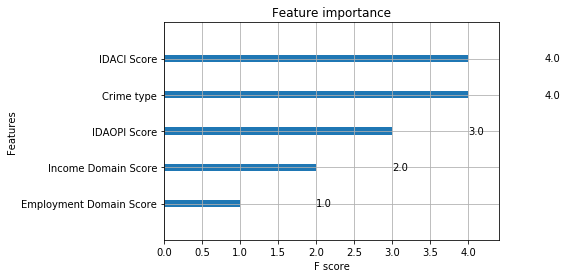

In [28]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.savefig("feature_importance.png")
plt.show()
